In [1]:
import os
from PIL import Image
from utils import *
import torch
from diffusers import StableDiffusionPipeline

device = "cuda:0"

### Load Stable Diffusion

In [2]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16
)
print("[INFO] Successfully loaded Stable Diffusion!")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/root/miniconda3/envs/pa3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[INFO] Successfully loaded Stable Diffusion!


### Load LoRA weights

In [16]:
# lora_path = "./runs/sd-naruto-model-lora"
# lora_path = "./runs/dreambooth-jjh"
lora_path = "./runs/dreambooth-jyj"
# lora_path = "./runs/zillioner"
# lora_path = "./runs/dreambooth_cat"
# lora_path = None  # if not using LoRA

if lora_path is not None:
    pipe.load_lora_weights(lora_path)
    print("[INFO] Successfully loaded LoRA weights!")
    
pipe = pipe.to(device)

[INFO] Successfully loaded LoRA weights!


### Inference

  0%|          | 0/60 [00:00<?, ?it/s]

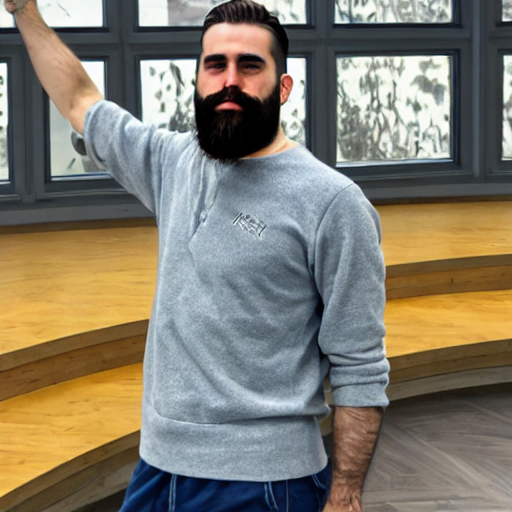

  0%|          | 0/60 [00:00<?, ?it/s]

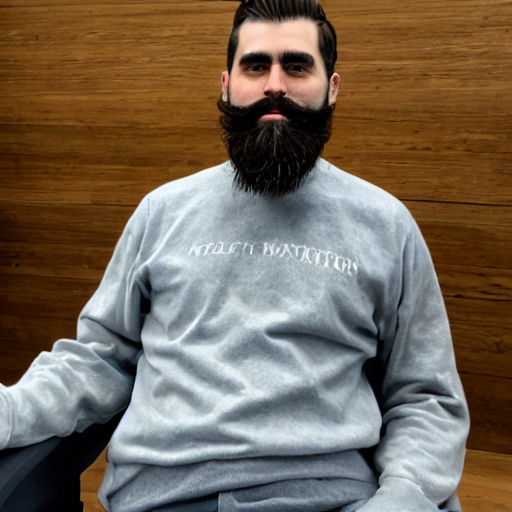

  0%|          | 0/60 [00:00<?, ?it/s]

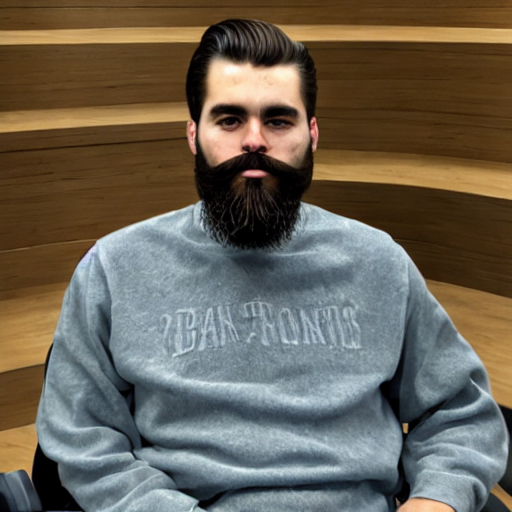

  0%|          | 0/60 [00:00<?, ?it/s]

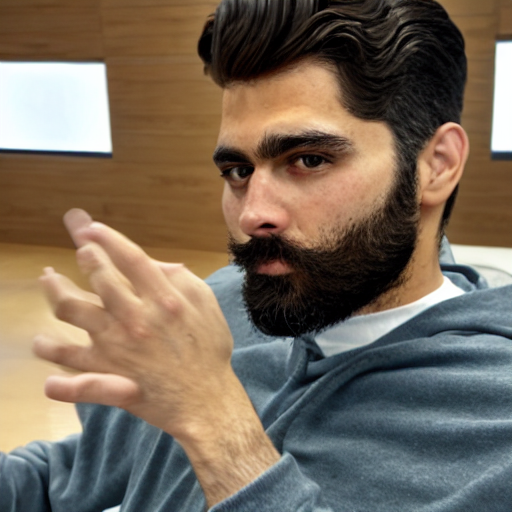

  0%|          | 0/60 [00:00<?, ?it/s]

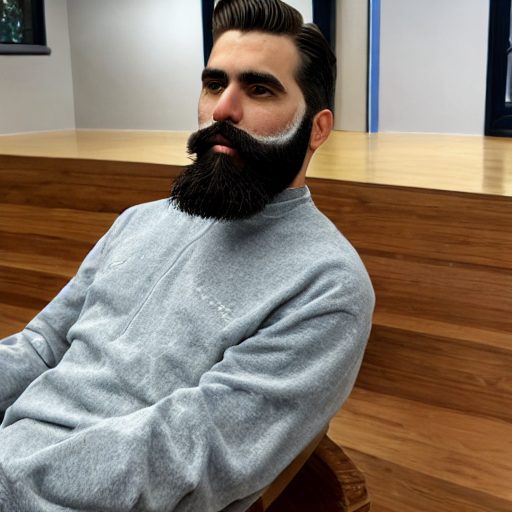

In [18]:
prompt = "A man with a beard"



# seed_everything(seed)
num_images = 5

for i in range(num_images):
    image = pipe(
        prompt, 
        num_inference_steps=60, 
        guidance_scale=7.5
    ).images[0]
    image.show()
    image.save(f"./outputs/jyj_{prompt}_{i}.png")

# image = pipe(
#     prompt, 
#     num_inference_steps=100, 
#     guidance_scale=7.5
# ).images[0]

# image